In [326]:
import pandas as pd
import matplotlib as plt
df = pd.read_excel('data.xlsx')

In [73]:
def keys(df, name):
    return df[df['status'] == name].index.values.astype(int)

In [74]:
def summarize(df, name1, name2):
    key1 = keys(df, name1)
    key2= keys(df, name2)
    res1 = df.iloc[key1[0]:key2[0]].loc[(df['status'] != 'ПРОСРОЧЕНО') & (df['status'] != 'НА ПОДПИСАНИИ')]
    return res1['sum'].astype(float).sum().round(2)

In [75]:
#1 question
print(summarize(df, 'Июль 2021', 'Август 2021'))

859896.47


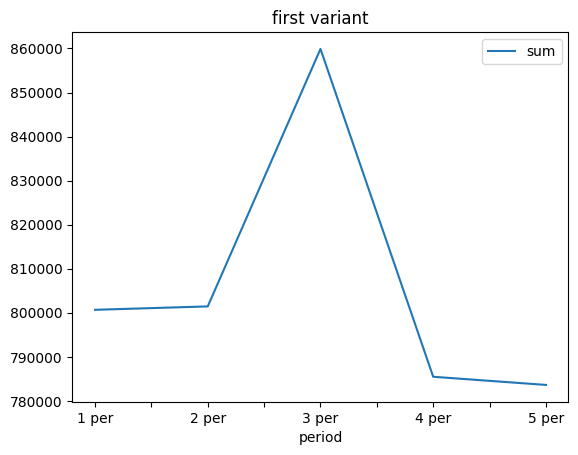

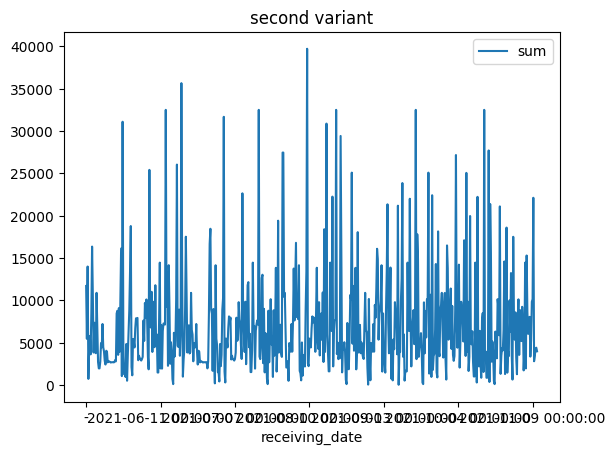

In [319]:

#2 question
import matplotlib.pyplot as plt
res1 = summarize(df, 'Май 2021', 'Июнь 2021')
res2 = summarize(df, 'Июнь 2021', 'Июль 2021')
res3 = summarize(df, 'Июль 2021', 'Август 2021')
res4 = summarize(df, 'Август 2021', 'Сентябрь 2021')
res5 = summarize(df, 'Сентябрь 2021', 'Октябрь 2021')
df1 = pd.DataFrame({'sum': [res1, res2, res3, res4, res5], 'period': ['1 per', '2 per', '3 per', '4 per', '5 per']})
plot1 = df1.plot.line(x = 'period', y = 'sum', title = 'first variant')
df2 = df[['sum', 'receiving_date']].dropna()
plot2 = df2.plot(x = 'receiving_date', y = 'sum', title = 'second variant')

In [320]:
#3 question
key1 = keys(df, 'Сентябрь 2021')
key2 = keys(df, 'Октябрь 2021')
res1 = df.iloc[key1[0]:key2[0]]
res1 = res1[['sum', 'sale']].dropna().groupby('sale').sum()
maximum = res1['sum'].max()
res1 = res1[res1['sum'] == res1['sum'].max()]
print(res1)

              sum
sale             
Смирнов  221525.7


In [321]:
#4 question
key1 = keys(df, 'Октябрь 2021')
res1 = df.iloc[key1[0]::]
res1 = res1.groupby('new/current')['new/current'].count()
res1 = res1[res1 == res1.max()]
print(res1)

new/current
текущая    99
Name: new/current, dtype: int64


In [322]:
#5 question
key1 = keys(df, 'Май 2021')
key2 = keys(df, 'Июнь 2021')
res1 = df.iloc[key1[0]+2:key2[0]]
res1['receiving_date'] = pd.to_datetime(res1['receiving_date'])
res1 = res1.loc[res1['receiving_date'].dt.month == 6]
print(res1['receiving_date'].count())


77


C:\Users\gelaz\AppData\Local\Temp\ipykernel_19512\903554743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res1['receiving_date'] = pd.to_datetime(res1['receiving_date'])


In [325]:
#task
key1 = keys(df, 'Июль 2021')
res1 = df.iloc[2:key1[0]]

res1['receiving_date'] = pd.to_datetime(res1['receiving_date'])
res1 = res1.loc[res1['receiving_date'].dt.month > 6]
res1.loc[(res1['document'] == 'оригинал') & (res1['new/current'] == 'новая') & (res1['status'] == 'ОПЛАЧЕНО'), 'bonus'] = res1['sum'] * 0.07
res1.loc[(res1['document'] == 'оригинал') & (res1['new/current'] == 'текущая') & (res1['status'] != 'ПРОСРОЧЕНО') & (res1['sum'] > 10000), 'bonus'] = res1['sum'] * 0.05
res1.loc[(res1['document'] == 'оригинал') & (res1['new/current'] == 'текущая') & (res1['status'] != 'ПРОСРОЧЕНО') & (res1['sum'] <= 10000), 'bonus'] = res1['sum'] * 0.03
res1 = res1[['bonus', 'sale']].dropna().groupby('sale').sum()
display(res1)

C:\Users\gelaz\AppData\Local\Temp\ipykernel_19512\2650994993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res1['receiving_date'] = pd.to_datetime(res1['receiving_date'])


,bonus
sale,
Андреев,3945.8297
Васильев,1037.0490
Иванов,5991.4520
Кузнецова,4496.9501
Петрова,10770.7474
Селиванов,5297.6900
Смирнов,6430.2650
Соколов,269.2110
Филимонова,2317.9579
